In [45]:
import os, sys
from os import listdir
from os.path import isfile, join, isdir
import numpy as np
import math
import pydicom
import torch
import h5py
import matplotlib.pyplot as plt

In [35]:
def get_file_list(path):
    files = [f for f in listdir(path) if isfile(join(path, f))]
    files.sort()
    return files

def get_id_list(path):
    dirs = [f for f in listdir(path) if isdir(join(path, f))]
    dirs.sort()
    ids = [s.split('_')[1] for s in dirs]
    return ids

In [6]:
file_id = '030'
path_in = '/bmrNAS/people/arjun/data/qdess_knee_2020/files_recon_calib-16/'
filename = '{}MTR_{}.h5'.format(path_in, file_id)

f = h5py.File(filename, 'r')
print(f.keys())

<KeysViewHDF5 ['kspace', 'maps', 'target']>


- questions to ask arjun
    - looks like tg, gl_area tags are blank. which default values do you use?
    - beta value for suppressing fluid: default 1.2 okay?
   
   
- questions to ask akshay
    - T1 = tissue.T1_EXPECTED * 1e-3 -- what's the cheapest way to get t1 value?
    - echotime varies by factor of 2 every alternating scan. why? which to use?

In [27]:
# clipping bounds for t2
__T2_LOWER_BOUND__ = 0
__T2_UPPER_BOUND__ = 100
__T2_DECIMAL_PRECISION__ = 1  # 0.1 ms

__GL_AREA_TAG__ = pydicom.tag.Tag(0x001910b6)
__TG_TAG__ = pydicom.tag.Tag(0x001910b7)

In [37]:
path_dcm = '/bmrNAS/people/akshay/dl/qdess_recon/segmentations/dicoms/'

file_id = '005'

file_id_list = get_id_list(path_dcm)

for file_id in file_id_list:

    path_mtr_dir = '{}MTR_{}/'.format(path_dcm, file_id)
    dcms_mtr = get_file_list(path_mtr_dir)

    for idx, d in enumerate(dcms_mtr):

        ds = pydicom.dcmread(path_mtr_dir + d)
        
        tr = float(ds.RepetitionTime) * 1e-3
        te = float(ds.EchoTime) * 1e-3
        alpha = math.radians(float(ds.FlipAngle))

        try:
            tg = float(ds[0x001910b7].value) * 1e-6
        except KeyError:
            tg = None
        try:
            gl_area = float(ds[0x001910b6].value)
        except KeyError:
            gl_area = None

        if idx == 0:
            print(idx, tr, te, tg, gl_area)
        if idx > 0:
            if tg or gl_area:
                print(idx, tr, te, tg, gl_area)

    sys.exit()

0 0.02036 0.006428 None None


SystemExit: 

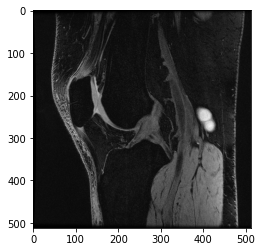

In [50]:
ds = pydicom.dcmread(path_mtr_dir + 'I167.dcm')

arr = ds.pixel_array
arr.shape

plt.imshow(arr,cmap='gray')